# My R notebook
## Load library

In [1]:
library(DESeq2)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    Filter, Find, Map, Position, Reduce, anyDuplicated, aperm, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    I, expand.grid, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb

Loading required package: SummarizedExperiment

Loading required package: M

## Read data

In [2]:
cts <- read.table("counts.txt", sep="\t",row.names=1)
colnames(cts) = c(paste0("condition1_",1:3),paste0("condition2_",1:3))
head(cts)

,condition1_1,condition1_2,condition1_3,condition2_1,condition2_2,condition2_3
,<int>,<int>,<int>,<int>,<int>,<int>
ostta01g00010,11,10,10,1,4,7
ostta01g00020,3,7,10,6,7,5
ostta01g00030,0,1,1,2,0,2
ostta01g00040,20,13,17,23,16,12
ostta01g00050,5,18,8,12,13,11
ostta01g00060,4,2,4,5,2,7


## Experimental data preparation

In [3]:
coldata = cbind.data.frame(condition= c(rep("condition1", 3),rep("condition2", 3)))
rownames(coldata) = c(paste0("condition1_",1:3),paste0("condition2_",1:3))
head(coldata)

,condition
,<chr>
condition1_1,condition1
condition1_2,condition1
condition1_3,condition1
condition2_1,condition2
condition2_2,condition2
condition2_3,condition2


## Deseq2

In [4]:
dds <- DESeqDataSetFromMatrix(countData = cts,
                              colData = coldata ,
                              design= ~ condition)
dds <- DESeq(dds)
resultsNames(dds) # lists the coefficients

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



[1] "Intercept"                          "condition_condition2_vs_condition1"

## Get results

In [5]:
res <- results(dds, name="condition_condition2_vs_condition1")
res

log2 fold change (MLE): condition condition2 vs condition1 
Wald test p-value: condition condition2 vs condition1 
DataFrame with 7664 rows and 6 columns
                        baseMean log2FoldChange     lfcSE      stat    pvalue
                       <numeric>      <numeric> <numeric> <numeric> <numeric>
ostta01g00010           7.088433     -1.4628099  0.813384 -1.798424 0.0721098
ostta01g00020           6.075950     -0.2021194  0.806824 -0.250512 0.8021912
ostta01g00030           0.936263      0.9463204  1.960157  0.482778 0.6292535
ostta01g00040          16.498881     -0.0676998  0.572858 -0.118179 0.9059258
ostta01g00050          10.719286      0.1597236  0.670239  0.238308 0.8116420
...                          ...            ...       ...       ...       ...
__no_feature            12184.10       0.214497  0.347472  0.617308  0.537031
__ambiguous                 0.00             NA        NA        NA        NA
__too_low_aQual             0.00             NA        NA        N

## Display results

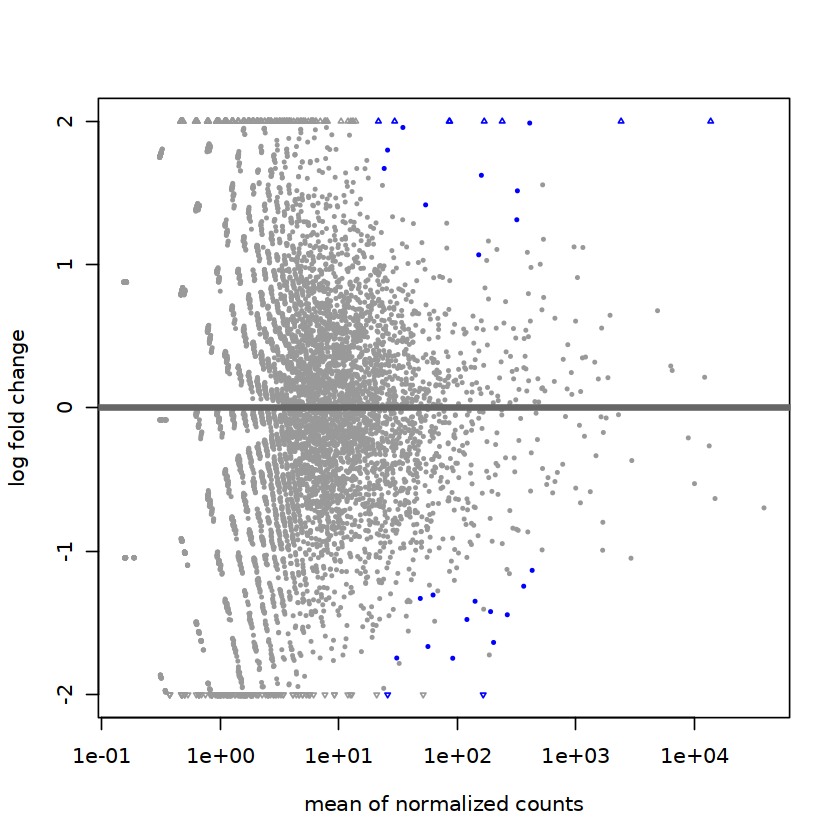

In [6]:
plotMA(res, ylim=c(-2,2))

## Export plot

In [7]:
png(file = "deseq2_demo.png", width = 800, height = 700)
plotMA(res, ylim=c(-2,2))
dev.off()

png 
  2

## Export Data

In [8]:
write.table(res,"deseq2_demo.tsv", quote=F, sep="\t", col.names=T)